<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/02_multyclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from keras import backend as K
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import itertools

In [ ]:
#y_pred and y_test should be formated as a vector

def plot_confusion_matrix(y_pred, y_test, figsize = (10, 10), classes = False, text_size = 10):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((10000, 28, 28), (10000,), (60000, 28, 28), (60000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

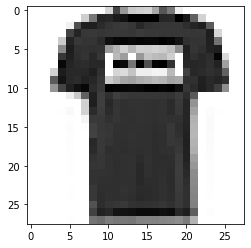

In [ ]:
# Plot pictures
imgplot = plt.imshow(X_train[1], cmap = plt.cm.binary)

In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
import random

In [ ]:
len(X_train)

60000

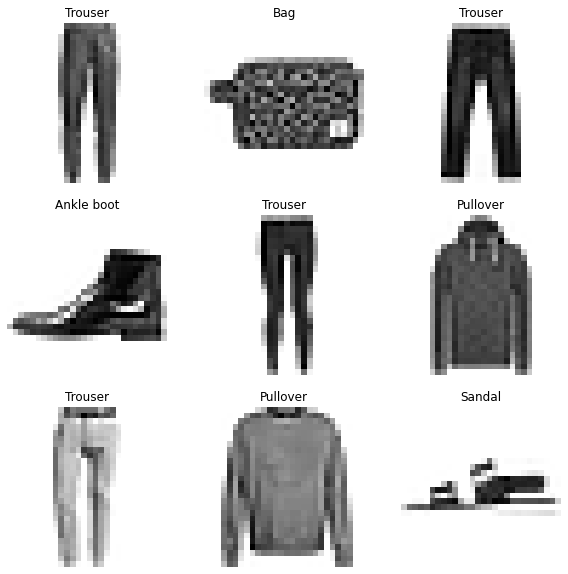

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[random_index], cmap = plt.cm.binary)
  plt.title(labels[y_train[random_index]])
  plt.axis(False)

In [ ]:
#For Categorical crossentropy we need our labels to be one hot encoded
y_train = tf.one_hot(y_train, depth = 10)
y_test = tf.one_hot(y_test, depth = 10)

### Normalize our data (min = 0, max = 255)

In [ ]:
#We can simply divide all data on 255
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape = (28,28)), #we need flatten first layer
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics='accuracy')
#we can use Sparce_categorical_crossentropy if we dont do one hot encoding for our labels

In [ ]:
history1 = model1.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0111 - accuracy: 0.5688 - val_loss: 0.7867 - val_accuracy: 0.6642
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7629 - accuracy: 0.6976 - val_loss: 0.7421 - val_accuracy: 0.7350
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6890 - accuracy: 0.7463 - val_loss: 0.6895 - val_accuracy: 0.7471
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6484 - accuracy: 0.7613 - val_loss: 0.6707 - val_accuracy: 0.7551
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6257 - accuracy: 0.7690 - val_loss: 0.6633 - val_accuracy: 0.7510
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6011 - accuracy: 0.7807 - val_loss: 0.6229 - val_accuracy: 0.7788
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5919 - accuracy: 0.7835 - val_loss: 0.6637 - val_accuracy:

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


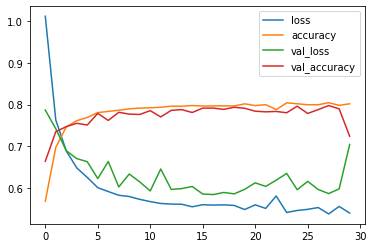

In [ ]:
pd.DataFrame(history1.history).plot()

### Finding ideal training rate

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape = (28,28)),
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), 
               loss = tf.keras.losses.CategoricalCrossentropy(), 
               metrics = ['accuracy'],
               )

In [ ]:
learning_rate = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [ ]:
history2 = model2.fit(X_train, y_train, callbacks = [learning_rate], epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5956 - accuracy: 0.4259
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8052 - accuracy: 0.7680
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.8109
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5313 - accuracy: 0.8234
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4991 - accuracy: 0.8303
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4774 - accuracy: 0.8357
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4621 - accuracy: 0.8412
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4491 - accuracy: 0.8448
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4376 - accuracy: 0.8482
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.429

In [ ]:
#Plot Learning Rate vs Loss
lr = 1e-4*10**(tf.range(30)/20)

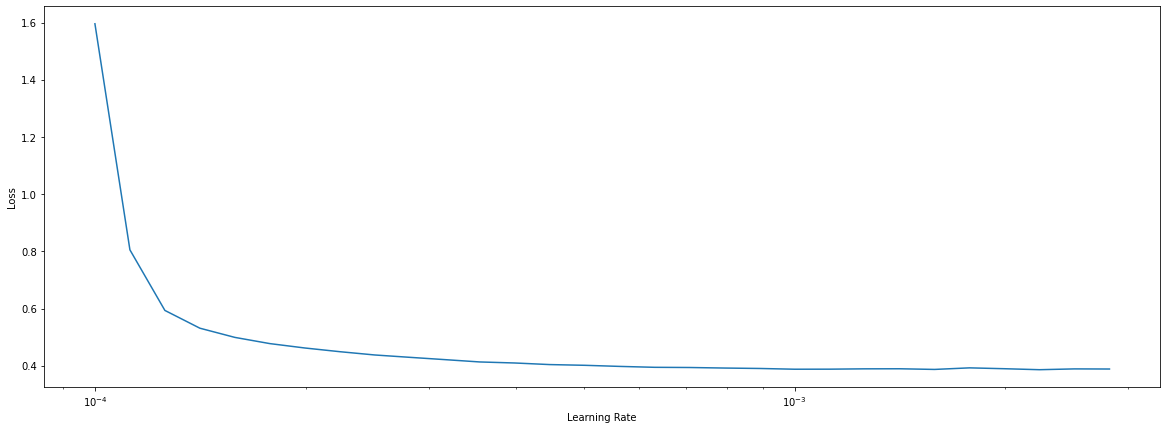

In [ ]:
plt.figure(figsize=(20,7))
plt.semilogx(lr, history2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [ ]:
#We try with learning rate 1e-4
#First result val_loss: 0.5959 - val_accuracy: 0.7916, after changing lr val_loss: 0.4366 - val_accuracy: 0.8475
#improving 5%

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model3 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape = (28,28)),
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), 
               loss = tf.keras.losses.CategoricalCrossentropy(), 
               metrics = ['accuracy'],
               )

In [ ]:
history3 = model3.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5956 - accuracy: 0.4259 - val_loss: 1.0646 - val_accuracy: 0.6720
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8234 - accuracy: 0.7640 - val_loss: 0.6983 - val_accuracy: 0.7862
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6128 - accuracy: 0.8078 - val_loss: 0.6011 - val_accuracy: 0.8044
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5498 - accuracy: 0.8192 - val_loss: 0.5593 - val_accuracy: 0.8136
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5182 - accuracy: 0.8261 - val_loss: 0.5378 - val_accuracy: 0.8164
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4975 - accuracy: 0.8310 - val_loss: 0.5227 - val_accuracy: 0.8222
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4834 - accuracy: 0.8346 - val_loss: 0.5111 - val_accuracy:

### Validate our model

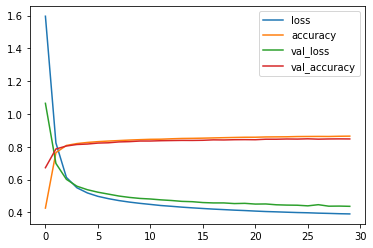

In [ ]:
pd.DataFrame(history3.history).plot()

In [ ]:
y_probs_3 = model3.predict(X_test)

In [ ]:
y_probs_3

array([[1.2510509e-06, 8.9303039e-06, 7.1526716e-07, ..., 1.2973408e-01,
        1.2635697e-03, 7.6070786e-01],
       [7.8780577e-05, 7.9813569e-09, 9.8237014e-01, ..., 7.1041019e-13,
        7.6023280e-06, 2.4477366e-18],
       [2.5963578e-05, 9.9989522e-01, 8.1435636e-10, ..., 7.6035600e-14,
        9.7728547e-10, 8.5419211e-10],
       ...,
       [2.8806848e-02, 4.6536786e-04, 3.4633307e-03, ..., 6.3484972e-06,
        8.6711848e-01, 9.9190729e-08],
       [4.8876745e-06, 9.9900788e-01, 2.7626186e-08, ..., 5.0227100e-10,
        1.9072697e-08, 3.9876559e-06],
       [9.1800938e-04, 1.8608796e-04, 1.2152954e-03, ..., 2.2678014e-02,
        3.2575000e-02, 1.3655093e-03]], dtype=float32)

In [ ]:
y_pred_3 = np.array(tf.argmax(y_probs_3, axis = 1))

In [ ]:
y_pred_3[0:10], np.array(tf.argmax(y_test, axis = 1))[0:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

In [ ]:
cm = confusion_matrix(np.array(tf.argmax(y_test, axis = 1)), y_pred_3)

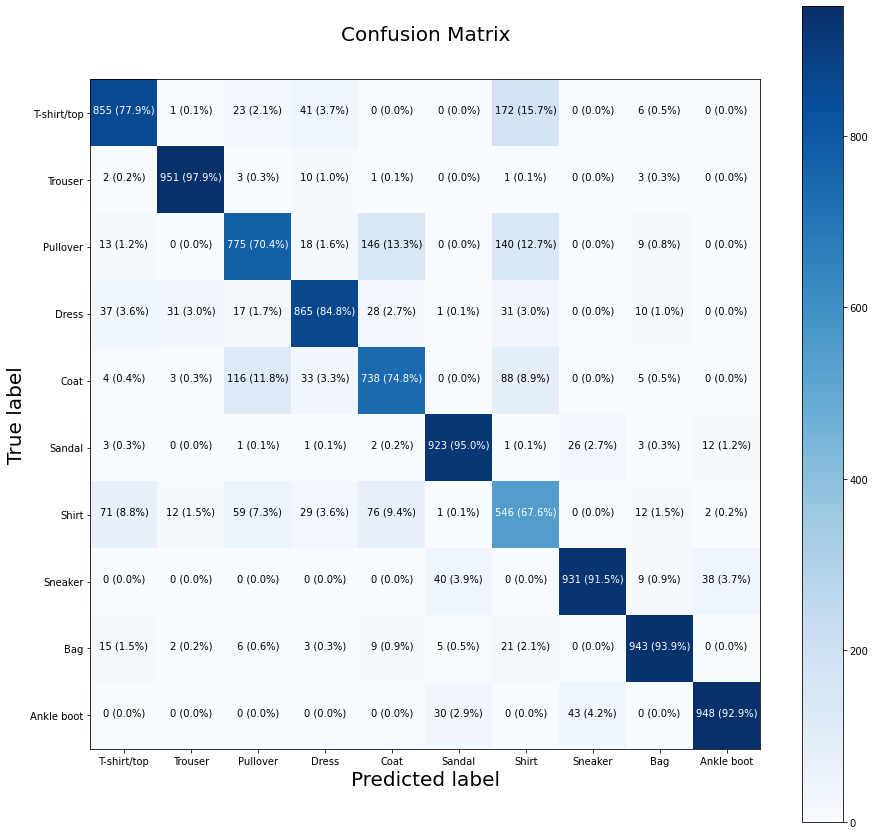

In [ ]:
plot_confusion_matrix(np.array(tf.argmax(y_test, axis = 1)), y_pred_3, figsize = (15,15), classes = labels)

In [ ]:
"""Visualise predictions 
Pics random images and print Real label and Prediction"""
# image_number should be devided by 3
# y_pred and y_test transformed to vector, X_test as matrix with color scales (0, 255)
def visualise_predictions(y_pred, y_test, y_probs, X_test, figsize = (10,15), image_number = 9):
  # plt.figure(figsize = figsize)
  fig, ax = plt.subplots(figsize=figsize)
  for i in range(image_number):
    plt.subplot(image_number/3, image_number/3, i+1)
    random_index = random.choice(range(len(X_test)))
    #Change color of title if prediction is false
    if y_test[random_index] == y_pred[random_index]:
      color = 'green'
    else:
      color = 'red'  
    plt.imshow(X_test[random_index]*255.0, cmap = plt.cm.binary)
    plt.title(f"Real: {labels[y_test[random_index]]} \n Predicted:{labels[y_pred[random_index]]} \n {tf.reduce_max(y_probs[random_index])*100:2.0f}% ", color = color)
    plt.axis(False)

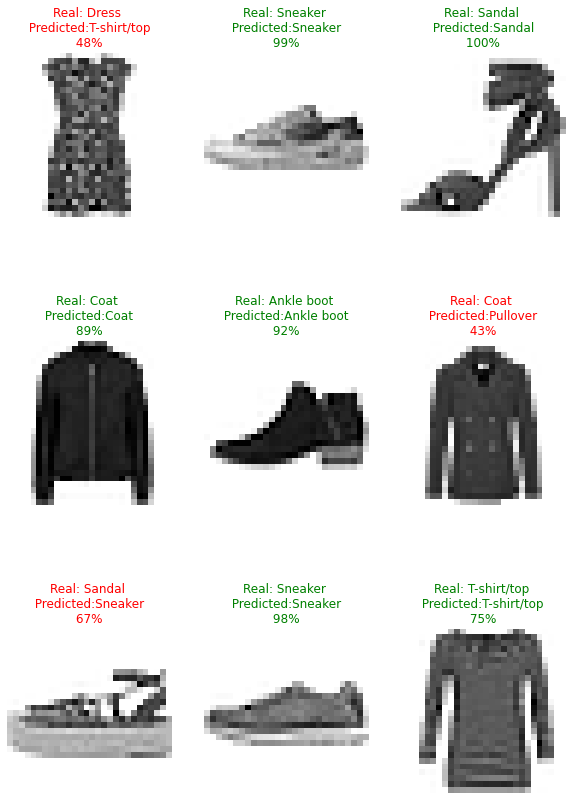

In [ ]:
visualise_predictions(y_pred_3, np.array(tf.argmax(y_test, axis = 1)), y_probs_3, X_test)

### What patterns is our model learning

In [ ]:
model3.layers

In [ ]:
model3.layers[1]

In [ ]:
#Get the weighs and biases from one layer
weights, biases = model3.layers[1].get_weights()

In [ ]:
weights, weights.shape
#every neuron has 784 weights. Weights initialized as random numbers

(array([[ 0.04304036, -0.07451461, -0.07393783, ...,  0.13910395,
         -0.02473451,  0.00334202],
        [ 0.0382838 , -0.06298435, -0.1069795 , ..., -0.11626004,
          0.00929519, -0.0845369 ],
        [ 0.20141158, -0.10134698, -0.22620764, ..., -0.16958134,
          0.22329737, -0.01681339],
        ...,
        [-0.04802637, -0.24684367, -0.16602017, ...,  0.02948643,
          0.14179923, -0.05963146],
        [ 0.144181  , -0.06433197, -0.25252685, ...,  0.07230847,
         -0.04890542, -0.05712381],
        [ 0.06007622, -0.04009932, -0.22439887, ..., -0.01444309,
          0.00408075, -0.02315225]], dtype=float32), (784, 10))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check bias vector
biases, biases.shape
#Every neuron in layer has one value bias. Bias inizialised as zeros
#The bias vector dictates, how much the patterns within the corresponding weights matwix should influence the next layer

(array([ 0.27128035,  0.04144656,  0.18791002,  0.10447836, -0.09281037,
         0.30291402,  0.11096512, -0.16970123,  0.41761488, -0.18936317],
       dtype=float32), (10,))

In [ ]:
from tensorflow.keras.utils import plot_model

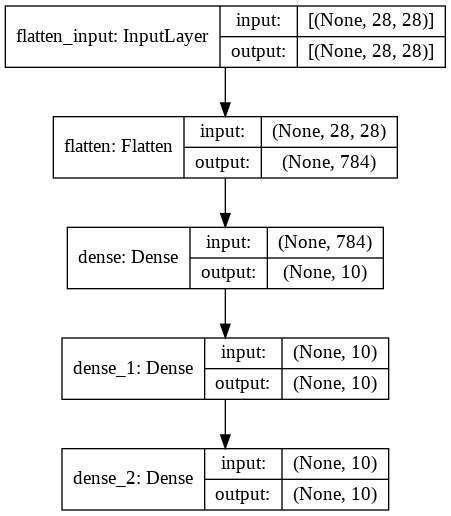

In [ ]:
plot_model(model3, show_shapes=True)

#### Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
(X_train_, y_train_), (X_test_, y_test_) = fashion_mnist.load_data()

In [ ]:
X_test_ = X_test_/255.0
X_train_ = X_train_/255.0

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model4 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape = (28,28)),
                              tf.keras.layers.Dense(50, activation='relu'),
                              tf.keras.layers.Dense(20, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
               metrics = ['accuracy'],
               )

In [ ]:
history4 = model4.fit(X_train_, y_train_, epochs = 100, validation_data = (X_test_, y_test_))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8585 - accuracy: 0.7320 - val_loss: 0.5856 - val_accuracy: 0.8039
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5200 - accuracy: 0.8247 - val_loss: 0.5144 - val_accuracy: 0.8239
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8394 - val_loss: 0.4903 - val_accuracy: 0.8283
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4378 - accuracy: 0.8487 - val_loss: 0.4593 - val_accuracy: 0.8405
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4192 - accuracy: 0.8540 - val_loss: 0.4489 - val_accuracy: 0.8407
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4050 - accuracy: 0.8589 - val_loss: 0.4452 - val_accuracy: 0.8445
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.4381 - val_ac

### Validate our model

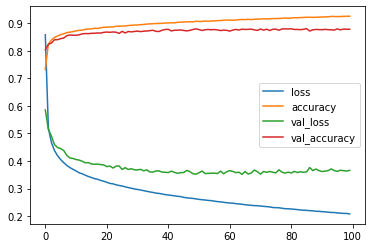

In [ ]:
pd.DataFrame(history4.history).plot()

In [ ]:
y_probs_4 = model4.predict(X_test_)

In [ ]:
y_probs_4

array([[2.09193711e-08, 4.96214758e-09, 1.01217529e-05, ...,
        4.14080620e-02, 2.99887051e-05, 9.57852066e-01],
       [3.92185902e-05, 1.77366906e-11, 9.94761646e-01, ...,
        4.54668612e-20, 1.65149174e-08, 1.21380943e-24],
       [5.30844954e-06, 9.99994159e-01, 6.66937616e-10, ...,
        4.90384472e-18, 5.98123842e-11, 3.33192675e-14],
       ...,
       [3.34017968e-04, 6.54709786e-10, 2.41139758e-04, ...,
        2.28817987e-09, 9.99274075e-01, 4.37452212e-13],
       [2.88549177e-06, 9.99861002e-01, 3.98917138e-07, ...,
        1.16554794e-10, 7.28149928e-07, 6.91294588e-07],
       [1.10222205e-08, 4.56470550e-09, 2.22753002e-07, ...,
        1.18815433e-05, 1.30768717e-06, 2.70782219e-09]], dtype=float32)

In [ ]:
y_pred_4 = np.array(tf.argmax(y_probs_4, axis = 1))

In [ ]:
y_pred_4[0:10], y_test[0:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [ ]:
model4.evaluate(X_test_, y_test_)

313/313 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8786


[0.3659682273864746, 0.878600001335144]

In [ ]:
cm = confusion_matrix(y_test_, y_pred_4)

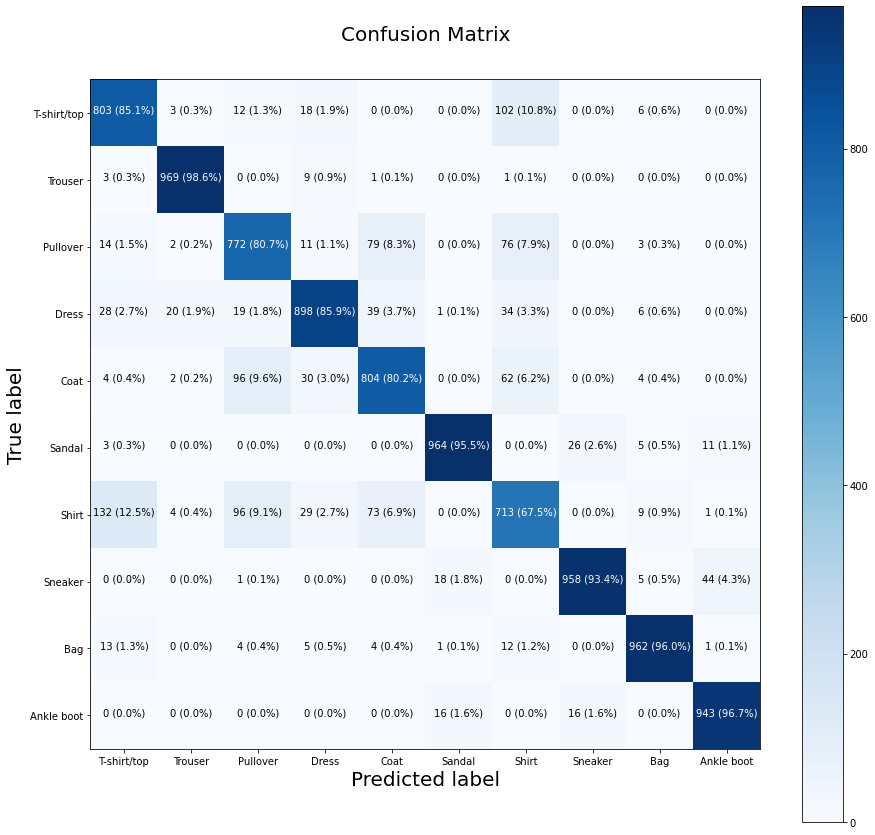

In [ ]:
plot_confusion_matrix(y_test_, y_pred_4, figsize = (15,15), classes = labels)

Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [ ]:
def show_pred(label, num_img, X = X_test_, y = y_test_, model = model4, figsize = (10,15)):
  #Plot 
  fig, ax = plt.subplots(figsize=figsize)
  # Choose indexes
  for i in range(num_img):
    plt.subplot(num_img/3, num_img/3, i+1)
    random_index = random.choice(np.where(y_test_ == label)[0])
    prob = model.predict(X_test_[random_index][tf.newaxis, ...])
    pred = tf.argmax(prob, axis = 1)
    if y_test_[random_index] == pred:
      color = 'green'
    else:
      color = 'red'
    plt.imshow(X_test_[random_index]*255.0, cmap = plt.cm.binary)
    plt.title(f"Real: {labels[y_test_[random_index]]} \n Predicted:{labels[int(pred)]} \n {tf.reduce_max(prob)*100:2.0f}% ", color = color)


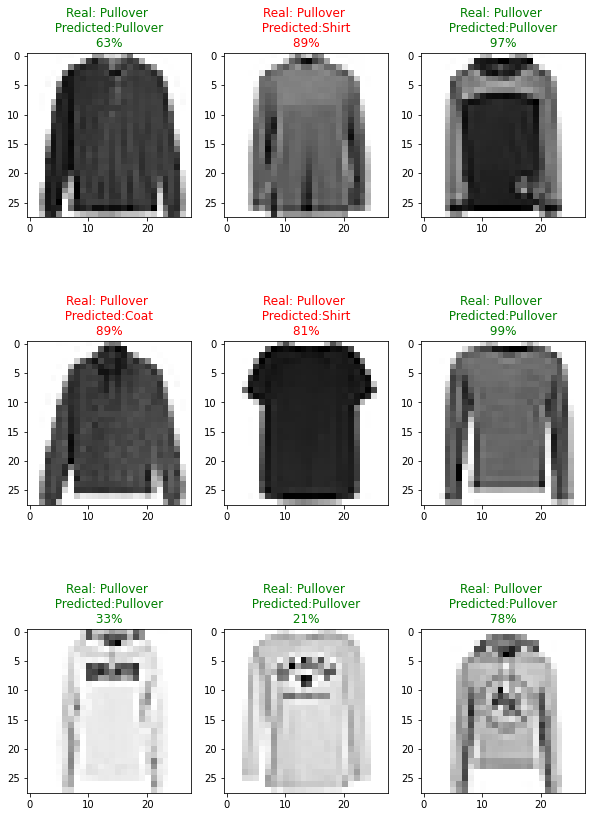

In [ ]:
show_pred(2, 9)